In [3]:
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
team_mapping = {
    'Atlanta Hawks': 'ATL',
    'Boston Celtics': 'BOS',
    'Brooklyn Nets': 'BKN',
    'Charlotte Bobcats': 'CHA',
    'Charlotte Hornets': 'CHO',  # For the current team, consider context for historical usage
    'Chicago Bulls': 'CHI',
    'Cleveland Cavaliers': 'CLE',
    'Dallas Mavericks': 'DAL',
    'Denver Nuggets': 'DEN',
    'Detroit Pistons': 'DET',
    'Golden State Warriors': 'GSW',
    'Houston Rockets': 'HOU',
    'Indiana Pacers': 'IND',
    'Kansas City Kings': 'KCK',
    'Los Angeles Clippers': 'LAC',
    'Los Angeles Lakers': 'LAL',
    'Memphis Grizzlies': 'MEM',
    'Miami Heat': 'MIA',
    'Milwaukee Bucks': 'MIL',
    'Minnesota Timberwolves': 'MIN',
    'New Jersey Nets': 'NJN',
    'New Orleans Hornets': 'NOH',
    'New Orleans Pelicans': 'NOP',
    'New Orleans/Oklahoma City Hornets': 'NOK',  # Temporary name due to Hurricane Katrina
    'New York Knicks': 'NYK',
    'Oklahoma City Thunder': 'OKC',
    'Orlando Magic': 'ORL',
    'Philadelphia 76ers': 'PHI',
    'Phoenix Suns': 'PHX',
    # 'Phoenix Suns': 'PHO',
    'Portland Trail Blazers': 'POR',
    'Sacramento Kings': 'SAC',
    'San Antonio Spurs': 'SAS',
    'San Diego Clippers': 'SDC',
    'Seattle SuperSonics': 'SEA',
    'Toronto Raptors': 'TOR',
    'Utah Jazz': 'UTA',
    'Vancouver Grizzlies': 'VAN',
    'Washington Bullets': 'WSB',
    'Washington Wizards': 'WAS'
}
team_mapping_inverted = {
    'ATL': 'Atlanta Hawks',
    'BOS': 'Boston Celtics',
    'BKN': 'Brooklyn Nets',
    'BRK': 'Brooklyn Nets',
    'CHH': 'Charlotte Hornets',  # Original Charlotte Hornets before the Bobcats
    'CHA': 'Charlotte Bobcats',  # Historical name
    'CHO': 'Charlotte Hornets',  # Current name
    'CHI': 'Chicago Bulls',
    'CLE': 'Cleveland Cavaliers',
    'DAL': 'Dallas Mavericks',
    'DEN': 'Denver Nuggets',
    'DET': 'Detroit Pistons',
    'GSW': 'Golden State Warriors',
    'HOU': 'Houston Rockets',
    'IND': 'Indiana Pacers',
    'KCK': 'Kansas City Kings',  # Historical name
    'LAC': 'Los Angeles Clippers',
    'LAL': 'Los Angeles Lakers',
    'MEM': 'Memphis Grizzlies',
    'MIA': 'Miami Heat',
    'MIL': 'Milwaukee Bucks',
    'MIN': 'Minnesota Timberwolves',
    'NJN': 'New Jersey Nets',  # Historical name
    'NOH': 'New Orleans Hornets',  # Historical name
    'NOP': 'New Orleans Pelicans',
    'NOK': 'New Orleans/Oklahoma City Hornets',  # Temporary name due to Hurricane Katrina
    'NYK': 'New York Knicks',
    'OKC': 'Oklahoma City Thunder',
    'ORL': 'Orlando Magic',
    'PHI': 'Philadelphia 76ers',
    'PHX': 'Phoenix Suns',
    'PHO': 'Phoenix Suns',
    'POR': 'Portland Trail Blazers',
    'SAC': 'Sacramento Kings',
    'SAS': 'San Antonio Spurs',
    'SDC': 'San Diego Clippers',  # Historical name
    'SEA': 'Seattle SuperSonics',  # Historical name
    'TOR': 'Toronto Raptors',
    'UTA': 'Utah Jazz',
    'VAN': 'Vancouver Grizzlies',  # Historical name
    'WSB': 'Washington Bullets',  # Historical name
    'WAS': 'Washington Wizards'
}
team_conference_mapping = {
    "Atlanta Hawks": "East",
    "Boston Celtics": "East",
    "Brooklyn Nets": "East",
    "Charlotte Hornets": "East",  # Covers both the original and current Charlotte Hornets
    "Charlotte Bobcats": "East",  # Historical name
    "Chicago Bulls": "East",
    "Cleveland Cavaliers": "East",
    "Dallas Mavericks": "West",
    "Denver Nuggets": "West",
    "Detroit Pistons": "East",
    "Golden State Warriors": "West",
    "Houston Rockets": "West",
    "Indiana Pacers": "East",
    "Kansas City Kings": "West",  # Historical name
    "Los Angeles Clippers": "West",
    "Los Angeles Lakers": "West",
    "Memphis Grizzlies": "West",
    "Miami Heat": "East",
    "Milwaukee Bucks": "East",
    "Minnesota Timberwolves": "West",
    "New Jersey Nets": "East",  # Historical name
    "New Orleans Hornets": "West",  # Historical name
    "New Orleans Pelicans": "West",
    "New Orleans/Oklahoma City Hornets": "West",  # Temporary name due to Hurricane Katrina
    "New York Knicks": "East",
    "Oklahoma City Thunder": "West",
    "Orlando Magic": "East",
    "Philadelphia 76ers": "East",
    "Phoenix Suns": "West",
    "Portland Trail Blazers": "West",
    "Sacramento Kings": "West",
    "San Antonio Spurs": "West",
    "San Diego Clippers": "West",  # Historical name
    "Seattle SuperSonics": "West",  # Historical name
    "Toronto Raptors": "East",
    "Utah Jazz": "West",
    "Vancouver Grizzlies": "West",  # Historical name
    "Washington Bullets": "East",  # Historical name
    "Washington Wizards": "East"
}



In [5]:

def get_nba_season_year(date=None):
    """
    Determines the NBA season year based on a given date.
    If no date is provided, it uses the current date.

    Args:
    date (datetime, optional): The date for which to determine the NBA season year.
                               If None, the current date is used. Defaults to None.

    Returns:
    int: The NBA season year.
    """
    if date is None:
        date = datetime.now()

    current_month = date.month
    current_year = date.year

    # Define the NBA season year
    # If it's October or later, the NBA season year is the next calendar year
    nba_season_year = current_year if current_month < 10 else current_year + 1

    return nba_season_year





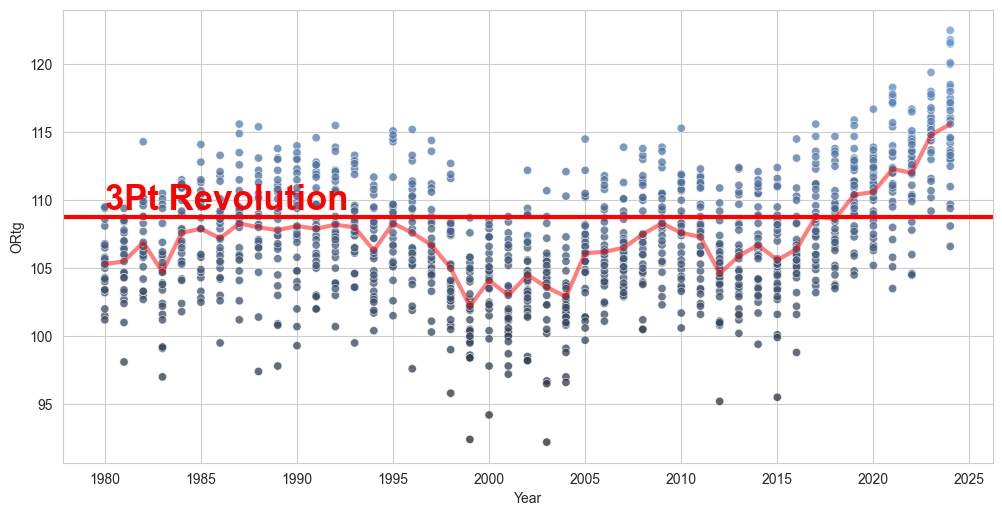

In [39]:
league_avg = pd.read_csv('/Users/chaseallbright/SynologyDrive/Synology Drive/NBA/Data/Team Data/Combined/league_stats.csv',index_col=0)
# league_avg = league_avg[league_avg['Team'].str.contains('League')]
sns.set_style('whitegrid')



plt.figure(figsize=(12,6),dpi=100)
sns.scatterplot(league_avg,x='Year',y='ORtg',hue='ORtg',palette=sns.dark_palette("#69d", reverse=False, as_cmap=True),alpha=.75,legend=False)
sns.lineplot(league_avg[league_avg['Team'].str.contains('League')],x='Year',y='ORtg',color='red',linewidth=3,alpha=.5)


# Specify the year for which you want to plot the horizontal line
specific_year = 2017

# Find the league average ORtg for that specific year
specific_year_avg = league_avg[(league_avg['Team'].str.contains('League')) & (league_avg['Year'] == specific_year)]['ORtg'].values[0]
plt.axhline(y=specific_year_avg, color='red',linewidth=3)



label_x_position = league_avg['Year'].min()  # Position at the start of the line
label_y_position = specific_year_avg + 0.5  # Slightly above the line
plt.text(label_x_position, label_y_position, f'3Pt Revolution', color='red',fontweight='bold',fontsize=25)

plt.xticks(range(int(league_avg.Year.min()), int(league_avg.Year.max()) + 4, 5))


plt.show()

# plt.figure(figsize=(12,6),dpi=100)
# sns.lineplot(league_avg[league_avg['Team'].str.contains('League')],x='Year',y='ORtg')
# plt.show()
# plt.figure(figsize=(12,6),dpi=100)
# sns.lineplot(league_avg[league_avg['Team'].str.contains('League')],x='Year',y='DRtg')
# plt.show()
#
# plt.figure(figsize=(12,6),dpi=100)
# sns.scatterplot(league_avg[(league_avg['Team'].str.contains('League')) & (league_avg['Team'].str.contains('2023'))],x='Year',y='DRtg')
# plt.show()

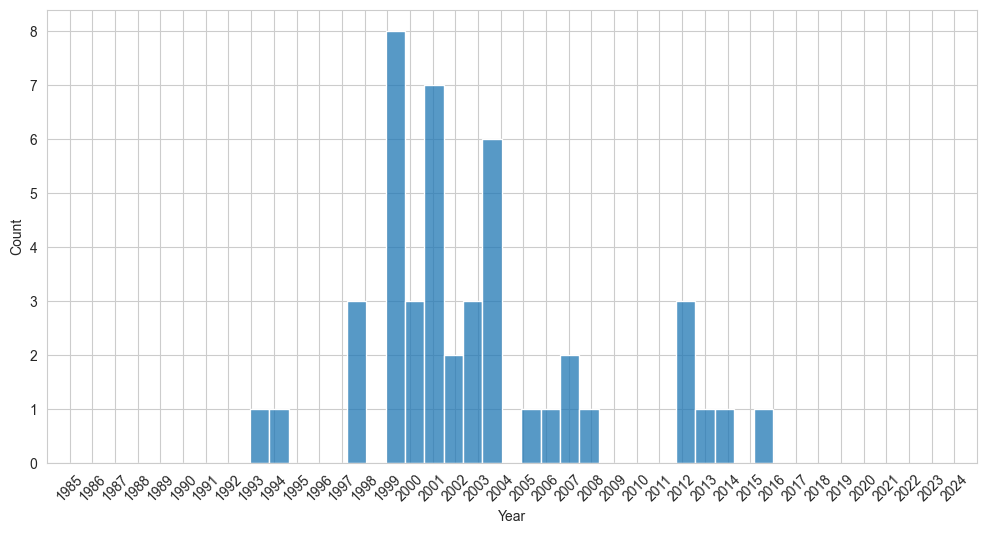

2     2004.0
0     1999.0
5     2004.0
6     1999.0
0     2004.0
3     1999.0
13    1999.0
11    1999.0
2     1999.0
0     2001.0
7     2001.0
8     2004.0
7     2003.0
0     2000.0
10    2001.0
2     1994.0
9     2012.0
0     2012.0
1     1999.0
8     2001.0
5     2000.0
2     2005.0
4     1999.0
6     1983.0
0     2008.0
2     2001.0
1     2016.0
9     2004.0
4     2000.0
10    1998.0
2     2003.0
15    2012.0
13    1983.0
3     2014.0
6     1998.0
3     1981.0
0     1981.0
4     2002.0
13    2001.0
7     2007.0
1     2006.0
3     2001.0
1     1993.0
0     2003.0
1     2004.0
2     2002.0
1     1998.0
8     2013.0
2     2007.0
11    1983.0
Name: Year, dtype: float64

In [49]:
plt.figure(figsize=(12,6),dpi=100)
data_set = league_avg.sort_values('DRtg',ascending=True).head(50).Year
sns.histplot(data_set,bins=len(range(1984,2025)))

plt.xticks(range(1985,2025,1),rotation=45,)
plt.xlim(1984, 2025)  # Adjust the x-axis limits to align with your bins
plt.show()
data_set

In [8]:
current_season_start_year = get_nba_season_year() - 1
print(f'Training with data up to {current_season_start_year}')

mvp_data_dir = '../Basketball Reference Stat Scraper/Awards/MVP'
player_data_dir = '../Basketball Reference Stat Scraper/player_stats/'
team_data_dir = '../Basketball Reference Stat Scraper/team_stats/'

full_data = []
for year in range(1980, current_season_start_year + 1):
    player_data = pd.read_csv(os.path.join(player_data_dir, f'{year}_player_stats.csv'), index_col=0)
    mvp_data = pd.read_csv(os.path.join(mvp_data_dir, f'{year}_MVP.csv'), index_col=0)
    team_data = pd.read_csv(os.path.join(team_data_dir, f'{year}_tm_stats.csv'), index_col=0)

    # Convert 'Tm' to full team names in player and mvp data
    player_data['Tm'] = player_data['Tm'].map(team_mapping_inverted).fillna(player_data['Tm'])
    mvp_data['Tm'] = mvp_data['Tm'].map(team_mapping_inverted).fillna(mvp_data['Tm'])

    mvp_data = mvp_data[mvp_data['Share'] > 0]
    mvp_data['MVP_Rank'] = mvp_data['Share'].rank(ascending=False,method='min')




    # Update 'Team' in team_data to use full team names and clean it
    team_data['Team'] = team_data['Team'].map(team_mapping_inverted).fillna(team_data['Team'])
    team_data['Team'] = team_data['Team'].str.strip('*')

    team_data = team_data[~team_data['Team'].str.contains('League')]
    team_data['Win%'] = team_data.W / team_data.G
    team_data['League_Rank'] = team_data['Win%'].rank(ascending=False,method='min')
    team_data['Conference'] = team_data['Team'].map(team_conference_mapping)
    team_data['Conference_Rank'] = team_data.groupby('Conference')['Win%'].rank(ascending=False,method='min')
    team_data['playoff_status'] = team_data['Conference_Rank'].apply(lambda x: 1 if x <= 8 else 0)



    # Prepend 'Team_' to team data columns except 'Team' and 'Year'
    team_data = team_data.rename(
        columns={col: f'Team_{col}' for col in team_data.columns if col not in ['Team', 'Year']})



    # Merge player data with mvp data
    merged_data = pd.merge(
        player_data.assign(Player=lambda df: df.Player.str.strip('*')),
        mvp_data,
        how='left'
    ).fillna(0)

    # Merge with team data using full team names
    merged_data = pd.merge(
        merged_data,
        team_data,
        left_on=['Tm', 'Year'],
        right_on=['Team', 'Year'],
        how='left'
    ).fillna(0)

    full_data.append(merged_data)

df = pd.concat(full_data)

Training with data up to 2023


In [9]:
import pandas as pd
import os

# Function to get the current NBA season year (placeholder)
def get_nba_season_year():
    # Replace with your actual function to get the current NBA season year
    return 2024

current_season_start_year = get_nba_season_year() - 1
print(f'Training with data up to {current_season_start_year}')

mvp_data_dir = '../Basketball Reference Stat Scraper/Awards/MVP'
player_data_dir = '../Basketball Reference Stat Scraper/player_stats/'
team_data_dir = '../Basketball Reference Stat Scraper/team_stats/'

full_data = []
for year in range(1980, current_season_start_year + 1):
    player_data = pd.read_csv(os.path.join(player_data_dir, f'{year}_player_stats.csv'), index_col=0)
    mvp_data = pd.read_csv(os.path.join(mvp_data_dir, f'{year}_MVP.csv'), index_col=0)
    team_data = pd.read_csv(os.path.join(team_data_dir, f'{year}_tm_stats.csv'), index_col=0)

    # Convert 'Tm' to full team names in player and mvp data
    # Note: 'team_mapping_inverted' needs to be defined earlier in your code
    player_data['Tm'] = player_data['Tm'].map(team_mapping_inverted).fillna(player_data['Tm'])
    mvp_data['Tm'] = mvp_data['Tm'].map(team_mapping_inverted).fillna(mvp_data['Tm'])

    # Process MVP data
    mvp_data = mvp_data[mvp_data['Share'] > 0]
    mvp_data['MVP_Rank'] = mvp_data['Share'].rank(ascending=False)

    # Process team data
    team_data['Team'] = team_data['Team'].map(team_mapping_inverted).fillna(team_data['Team'])
    team_data['Team'] = team_data['Team'].str.strip('*')
    team_data = team_data[~team_data['Team'].str.contains('League')]
    team_data['Win%'] = team_data.W / team_data.G
    team_data['League_Rank'] = team_data['Win%'].rank(ascending=False)
    team_data['Conference'] = team_data['Team'].map(team_conference_mapping)  # 'team_conference_mapping' needs definition
    team_data['Conference_Rank'] = team_data.groupby('Conference')['Win%'].rank(ascending=False)
    team_data['playoff_status'] = team_data['Conference_Rank'].apply(lambda x: 1 if x <= 8 else 0)

    team_data['DRtg_Rank'] = team_data.DRtg.rank(method='min')
    team_data['ORtg_Rank'] = team_data.ORtg.rank(ascending=False,method='min')

    # Rename team data columns correctly
    team_data = team_data.rename(columns={col: f'Team_{col}' for col in team_data.columns if col not in ['Team', 'Year']})

    # Merge player data with MVP data
    merged_data = pd.merge(
        player_data.assign(Player=lambda df: df.Player.str.strip('*')),
        mvp_data,
        how='left'
    ).fillna(0)

    # Merge with team data using full team names
    merged_data = pd.merge(
        merged_data,
        team_data,
        left_on=['Tm', 'Year'],
        right_on=['Team', 'Year'],
        how='left'
    ).fillna(0)

    # Select columns to calculate the stats
    columns_to_calculate = ['Team_FG', 'Team_FGA', 'Team_FG%', 'Team_3P', 'Team_3PA', 'Team_3P%',
                            'Team_2P', 'Team_2PA', 'Team_2P%', 'Team_FT', 'Team_FTA', 'Team_FT%',
                            'Team_ORB', 'Team_DRB', 'Team_TRB', 'Team_AST', 'Team_STL', 'Team_BLK',
                            'Team_TOV', 'Team_PF', 'Team_PTS', 'Team_MOV', 'Team_SOS', 'Team_SRS',
                            'Team_ORtg', 'Team_DRtg', 'Team_NRtg', 'Team_Pace', 'Team_FTr',
                            'Team_3PAr', 'Team_TS%', 'Team_Win%', 'Team_Age']

    # Calculate mean and standard deviation for the current year's team data
    mean_stats = team_data[columns_to_calculate].mean()
    std_stats = team_data[columns_to_calculate].std()

    # Compute raw differences and Z-scores for the selected team's statistics
    for col in columns_to_calculate:
        stat = col.replace('Team_', '')  # Extract the original stat name
        merged_data[f'{stat}_off_avg'] = merged_data[col] - mean_stats[col]
        merged_data[f'{stat}_Z'] = (merged_data[col] - mean_stats[col]) / std_stats[col]

    full_data.append(merged_data)

# Combine all data into a single DataFrame
df = pd.concat(full_data)
df

Training with data up to 2023


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FTr_off_avg,FTr_Z,3PAr_off_avg,3PAr_Z,TS%_off_avg,TS%_Z,Win%_off_avg,Win%_Z,Age_off_avg,Age_Z
0,Kareem Abdul-Jabbar,C,32,Los Angeles Lakers,82,0,38.3,10.2,16.9,0.604,...,-0.023636,-0.731275,-0.016636,-1.092781,0.037636,2.381900,2.317073e-01,1.523545e+00,-0.209091,-0.194463
1,Tom Abernethy,PF,25,Golden State Warriors,67,0,18.2,2.3,4.7,0.481,...,-0.045636,-1.411924,-0.013636,-0.895723,-0.011364,-0.719173,-2.073171e-01,-1.363171e+00,-0.109091,-0.101459
2,Alvan Adams,C,25,Phoenix Suns,75,0,28.9,6.2,11.7,0.531,...,0.033364,1.032223,0.008364,0.549376,0.016636,1.052869,1.707317e-01,1.122612e+00,0.090909,0.084549
3,Tiny Archibald,PG,31,Boston Celtics,80,80,35.8,4.8,9.9,0.482,...,0.024364,0.753776,0.026364,1.731730,0.018636,1.179443,2.439024e-01,1.603731e+00,0.890909,0.828581
4,Dennis Awtrey,C,31,Chicago Bulls,26,0,21.5,1.0,2.3,0.450,...,0.065364,2.022258,0.009364,0.615063,0.013636,0.863007,-1.341463e-01,-8.820521e-01,-0.509091,-0.473475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Thaddeus Young,PF,34,Toronto Raptors,54,9,14.7,2.0,3.7,0.545,...,-0.009900,-0.480304,-0.036800,-0.867827,-0.026467,-1.639278,5.551115e-17,4.540967e-16,-0.256667,-0.131887
535,Trae Young,PG,24,Atlanta Hawks,73,73,34.8,8.2,19.0,0.429,...,-0.022900,-1.111007,-0.056800,-1.339472,-0.002467,-0.152779,5.551115e-17,4.540967e-16,-1.156667,-0.594346
536,Omer Yurtseven,C,24,Miami Heat,9,0,9.2,1.8,3.0,0.593,...,0.003100,0.150398,0.020200,0.476361,-0.007467,-0.462466,3.658537e-02,2.992785e-01,1.643333,0.844417
537,Cody Zeller,C,30,Miami Heat,15,2,14.5,2.5,3.9,0.627,...,0.003100,0.150398,0.020200,0.476361,-0.007467,-0.462466,3.658537e-02,2.992785e-01,1.643333,0.844417


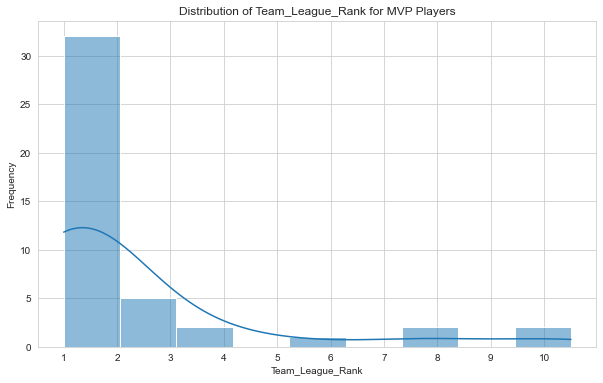

In [10]:
mvp_players = df[df['MVP_Rank'] == 1]

stat = 'Team_League_Rank'

plt.figure(figsize=(10, 6),facecolor='white')
sns.histplot(mvp_players[stat], kde=True, bins=9)
plt.title(f'Distribution of {stat} for MVP Players')
plt.xticks(range(1,11,))
plt.xlabel(stat)
plt.ylabel('Frequency')
plt.show()

In [11]:
len(mvp_players[mvp_players['Team_League_Rank'] <= 2])/ len(mvp_players)

0.7272727272727273

In [12]:
len(mvp_players[mvp_players['Team_Conference_Rank'] <= 3]) / len(mvp_players)

0.8863636363636364

In [13]:
mvp_players = mvp_players.sort_values('Year')

In [14]:
mvp_players['%Games_Played'] = 82 * (mvp_players['G'] / mvp_players['Team_G'])
mvp_players['%Games_Started'] = 82 * (mvp_players['GS'] / mvp_players['Team_G'])
mvp_players['%Teams_PTS_Scored'] = mvp_players['PTS'] / mvp_players['Team_PTS']

In [15]:
mvp_players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,3PAr_Z,TS%_off_avg,TS%_Z,Win%_off_avg,Win%_Z,Age_off_avg,Age_Z,%Games_Played,%Games_Started,%Teams_PTS_Scored
0,Kareem Abdul-Jabbar,C,32,Los Angeles Lakers,82,0,38.3,10.2,16.9,0.604,...,-1.092781,0.037636,2.381900,0.231707,1.523545,-0.209091,-0.194463,82.000000,0.000000,0.227106
82,Julius Erving,SF,30,Philadelphia 76ers,82,82,35.0,9.7,18.6,0.521,...,-1.068286,0.027522,2.009724,0.256098,1.594925,0.991304,0.938252,82.000000,82.000000,0.236994
186,Moses Malone,C,26,Houston Rockets,81,81,42.0,11.7,22.5,0.519,...,-0.194598,-0.018348,-1.137167,0.060976,0.399159,2.134783,1.718934,81.000000,81.000000,0.293673
177,Moses Malone,C,27,Philadelphia 76ers,78,78,37.5,8.4,16.7,0.501,...,-1.326760,0.017783,1.098622,0.292683,1.814701,0.595652,0.458505,78.000000,78.000000,0.234674
15,Larry Bird,PF,27,Boston Celtics,79,77,38.3,9.6,19.5,0.492,...,0.606428,0.011174,0.782043,0.256098,2.236298,1.613043,1.414088,79.000000,77.000000,0.229167
15,Larry Bird,SF,28,Boston Celtics,80,77,39.5,11.5,22.0,0.522,...,0.625591,0.020609,1.235071,0.268293,1.834492,2.047826,1.776377,80.000000,77.000000,0.265495
16,Larry Bird,SF,29,Boston Celtics,82,81,38.0,9.7,19.6,0.496,...,1.265391,0.023435,1.496409,0.317073,2.207458,2.526087,2.474635,82.000000,81.000000,0.246418
132,Magic Johnson,PG,27,Los Angeles Lakers,80,80,36.3,8.5,16.4,0.522,...,0.534767,0.038957,2.065621,0.292683,1.896289,1.195652,1.205847,80.000000,80.000000,0.220276
145,Michael Jordan,SG,24,Chicago Bulls,82,82,40.4,13.0,24.4,0.535,...,-1.147964,0.000913,0.052652,0.109756,0.697010,-1.369565,-1.054239,82.000000,82.000000,0.344488
153,Magic Johnson,PG,29,Los Angeles Lakers,77,77,37.5,7.5,14.8,0.509,...,0.711318,0.032920,1.816337,0.195122,1.202917,2.620000,1.787865,77.000000,77.000000,0.209302
